___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

`사용하려고 하는 기본적인 라이브러리 임포트`

In [15]:
# IMPORTS HERE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

`데이터 로드(자동차 주행 거리), 열방향 인덱스에 날짜 설정, 빈도 설정`

In [2]:
# CODE HERE

In [4]:
df = pd.read_csv('data/Miles_Traveled.csv', index_col='DATE', parse_dates=True)
df.index.freq='MS'
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

`열 이름을 Value로 바꾸기`

In [5]:
# CODE HERE
df.columns = ['Value']
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

`시계열 플롯 그리기`

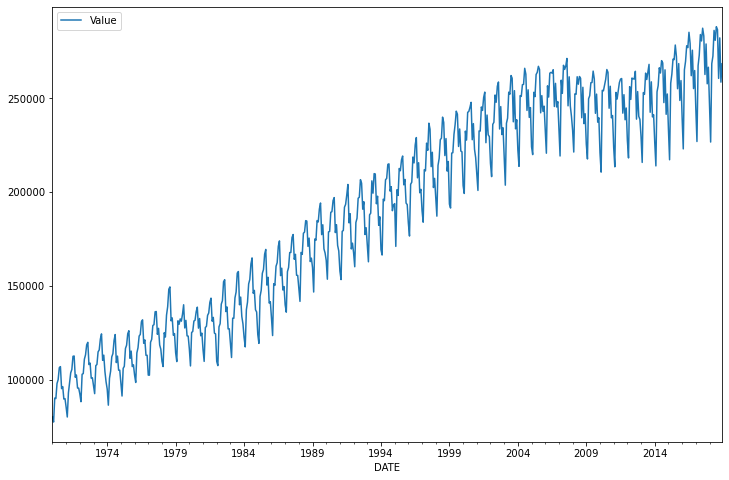

In [6]:
# CODE HERE
df.plot(figsize=(12,8));

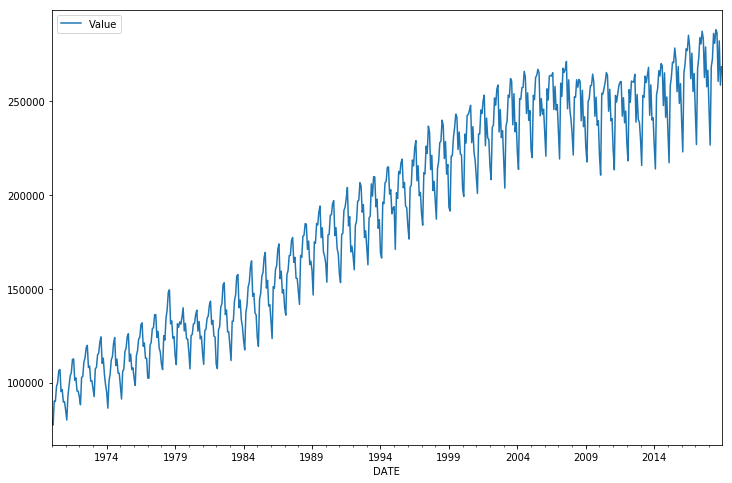

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

`계절성 분해하고 ETS 요소들을 플롯으로 그림`

In [17]:
# CODE HERE
from statsmodels.tsa.seasonal import seasonal_decompose

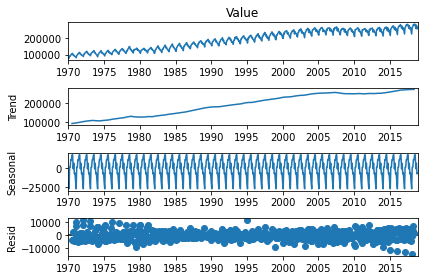

In [20]:
results = seasonal_decompose(df['Value'])
results.plot();

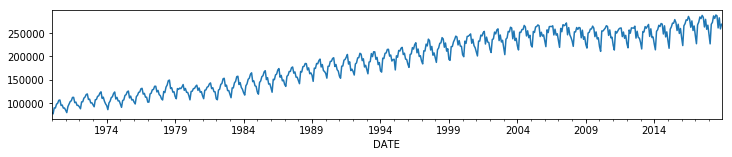

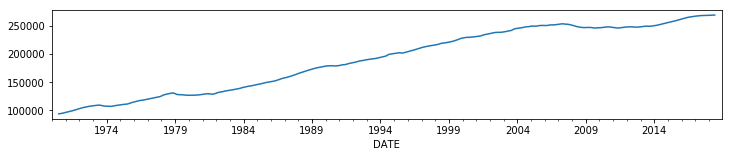

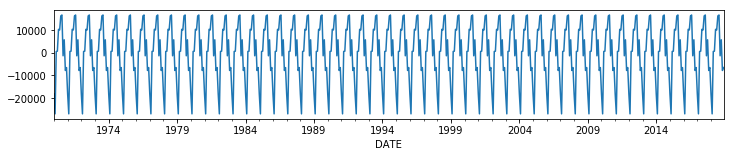

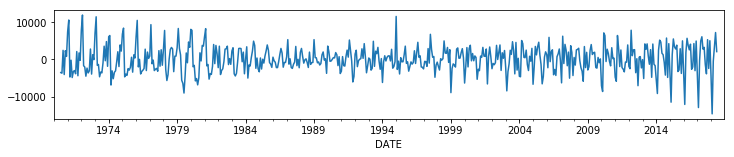

## Train Test Split

**TASK: Figure out the length of the data set**

`데이터셋 분리 (데이터셋 길이 알아보기, 데이터를 훈련용과 테스트 용으로 나누기`

In [8]:
# CODE HERE
len(df['Value'])

588

588

In [9]:
588-12

576

In [25]:
train = df.iloc[:576]
test = df.iloc[576:]

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**
`(테스트 데이터는 지난 12개월치, 전체 데이터셋은 588개의 데이터포인트가 있음)`

In [26]:
# CODE HERE
len(test)

12

In [16]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**
`데이터 스케일링`

In [27]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(train)

MinMaxScaler()

In [30]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

`TimeSeriesGenerator 객체 만들기`

In [31]:
#CODE HERE
from keras.preprocessing.sequence import TimeseriesGenerator

In [34]:
n_input = 24 # 예측 기간 전에 몇 번 기간이 나오는지(최소 12개월의 기간을 보는 것이 좋음)
n_features= 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=n_input, batch_size=1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

`LSTM 유닛으로 순차 모델 만들기`

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

`모델을 제너레이터에 피팅하고 에포크 설정`

In [38]:
# CODE HERE
model.fit_generator(generator, epochs=30)

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
552/552 [==============================] - 17s 4ms/step - loss: 0.0448
Epoch 2/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0074
Epoch 3/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0055
Epoch 4/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0050
Epoch 5/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0045
Epoch 6/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0047
Epoch 7/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0023
Epoch 8/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0020
Epoch 9/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 10/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0021
Epoch 11/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 12/30
552/552 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 13/30
552/552 [===

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

`훈련 중에 발생한 손실 히스토리 플롯을 그리기`

In [39]:
# CODE HERE
loss_per_epoch = model.history.history['loss']

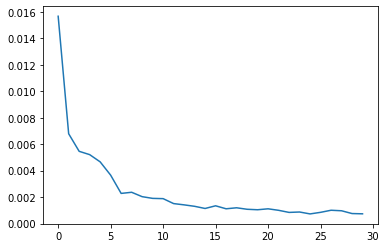

In [40]:
plt.plot(range(len(loss_per_epoch_epochper_epoch)), loss_per_epoch)

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

`테스트 데이터셋에서 평가`

In [41]:
# CODE HERE
first_val_batch = scaled_train[-12:]
first_val_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

**TASK: Generate predictions into the same time stamps as the test set**

`테스트 데이터 셋에서 예측`

In [43]:
# CODE HERE
test_predictions = []
first_val_batch = scaled_train[-n_input:]

current_batch = first_val_batch.reshape((1,n_input, n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

`역변환`

In [44]:
#CODE HERE

true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[245128.30743206],
       [242168.3748613 ],
       [266790.24462837],
       [273388.22252119],
       [280802.16018462],
       [280822.70336902],
       [286052.32001692],
       [282264.61722118],
       [271066.37977427],
       [278325.79315603],
       [261700.00135088],
       [262669.45949507]])

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

`테스트 데이터프레임과 결합하기`

In [45]:
# CODE HERE

test['Predictions'] = true_predictions
test.head()

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Value,Predictions
DATE,,
2018-01-01,245695.0,245128.307432
2018-02-01,226660.0,242168.374861
2018-03-01,268480.0,266790.244628
2018-04-01,272475.0,273388.222521
2018-05-01,286164.0,280802.160185


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

`결합한 데이터프레임 플롯 그리기`

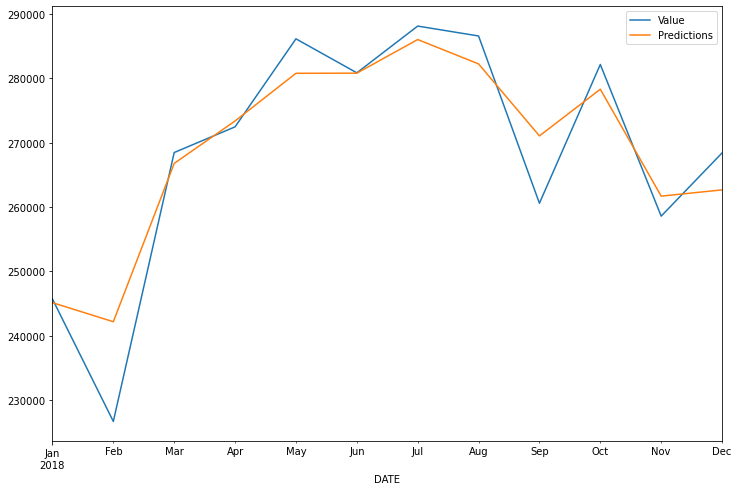

In [46]:
# CODE HERE

test.plot(figsize=(12,8));

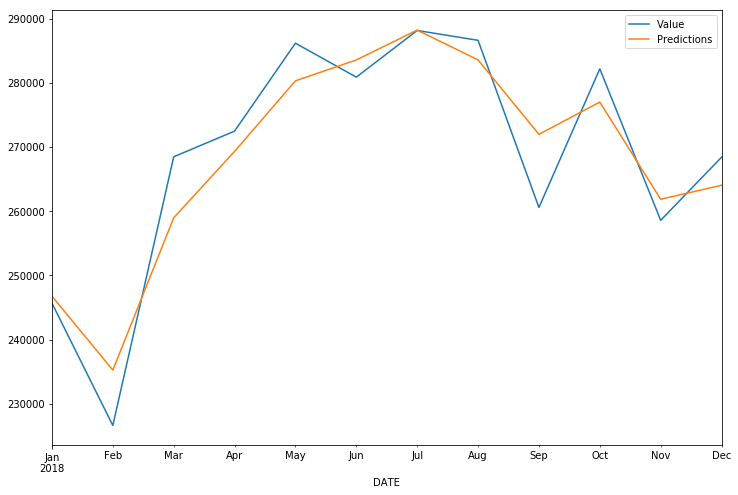

# Saving Models

**TASK: Optional, Save your model!**

`모델 저장하기`

In [47]:
model.save('solutions.h5')